<a href="https://colab.research.google.com/github/sebastianmunozvasq/Portfolio-SMV/blob/main/Velocity_profile_of_a_flow_around_a_sphere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Velocity profile of a flow around a sphere


#### Objective

Consider an incompressible fluid around a static solid sphere of radius R and diameter D. The fluid, with density $\rho$ and viscosity $\mu$ approaches the sphere vertically from bottom to top with a uniform velocity $v_{\infty}$. This velocity is also called **approximation velocity**, in external flow problems.

You should consider that for this problem the fluid is viscous enough for the flow to be considered as creeping flow. This means that the Reynolds number is less than 0.1. In this case, the non-stationary and convective terms can be neglected according to the dimensionless Navier-Stokes equation obtained by scaling the pressure gradient with the viscous forces:

$$ \text{Re} \frac{D \tilde{v}}{d \tilde{t}} = - \tilde{\nabla} \mathcal{\tilde{\tilde{P}}} + \tilde{\nabla}^2 \tilde{v} \hspace{0.5cm}$$

If $\text{Re} \rightarrow 0$, the Stokes Equation is obtained,

$$ \tilde{\nabla} \mathcal{\tilde{\tilde{P}}}=  \tilde{\nabla}^2 \tilde{v} \hspace{0.5cm}$$

which is widely used in systems where viscous forces are dominant, such as arteries, capillaries and microfluidic systems.

This flow regime is characterized by the absence of eddy formation downstream of the sphere.


For this, we wish to plot the following velocity profiles:

$$v_r(r,\theta) = v_{\infty}\cdot \left[1- \frac{3}{2} \left(\frac{R}{r}\right)+\frac{1}{2} \left(\frac{R}{r}\right)^3\right]\cdot cos(\theta)$$

$$v_{\theta}(r,\theta) = v_{\infty}\cdot \left[-1+\frac{3}{4} \left(\frac{R}{r}\right)+\frac{1}{4} \left(\frac{R}{r}\right)^3\right]\cdot sin(\theta)$$

We will consider that $r$ is the horizontal coordinate and $\theta$ is the vertical coordinate. Also, consider that the sphere has a radius of 5 meters and that the approach velocity is 5 m/s.

In [ ]:
# Importar los paquetes necesarios
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Definition of physical parameters of the problem

# Approach velocity, v_infinity
v_infinity = 5  # m/s

# Radius of the sphere
R = 5  # m

# Number of points in the radial and angular directions
Nx = 100
Ny = 100

# Define the generating vectors of the domain
# using the linspace function
x = np.linspace(5, 10, Nx)
y = np.linspace(0, 2 * np.pi, Ny)

# With these vectors, we can generate a grid using the meshgrid function from NumPy
# Meshgrid generates matrices X and Y to create a "grid" based on the generating vectors
X, Y = np.meshgrid(x, y)

<ipython-input-10-add4a8fdbe4f>:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(X, Y, 'o', color='k', marker='.', linestyle='none')


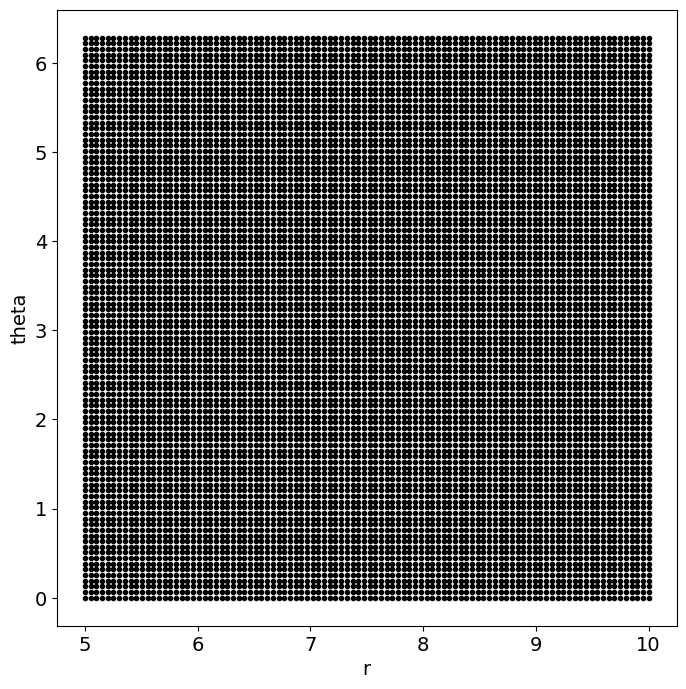

In [ ]:
# Creating the figure
plt.figure(figsize=[8, 8])

# Scatter plot with 2D input
plt.plot(X, Y, 'o', color='k', marker='.', linestyle='none')

# Axis titles
plt.xlabel('r', fontsize=14)
plt.ylabel('theta', fontsize=14)

# Increase the size of the axis labels
plt.tick_params(axis='both', which='major', labelsize=14)

Note that the radial coordinate starts at 5 because the intention is to analyze the external flow around the sphere.

You are asked to plot: A line graph with the magnitudes of radial and tangential velocity as a function of radius for three fixed angles. A line graph with the magnitudes of radial and tangential velocity as a function of angle for three fixed radii.

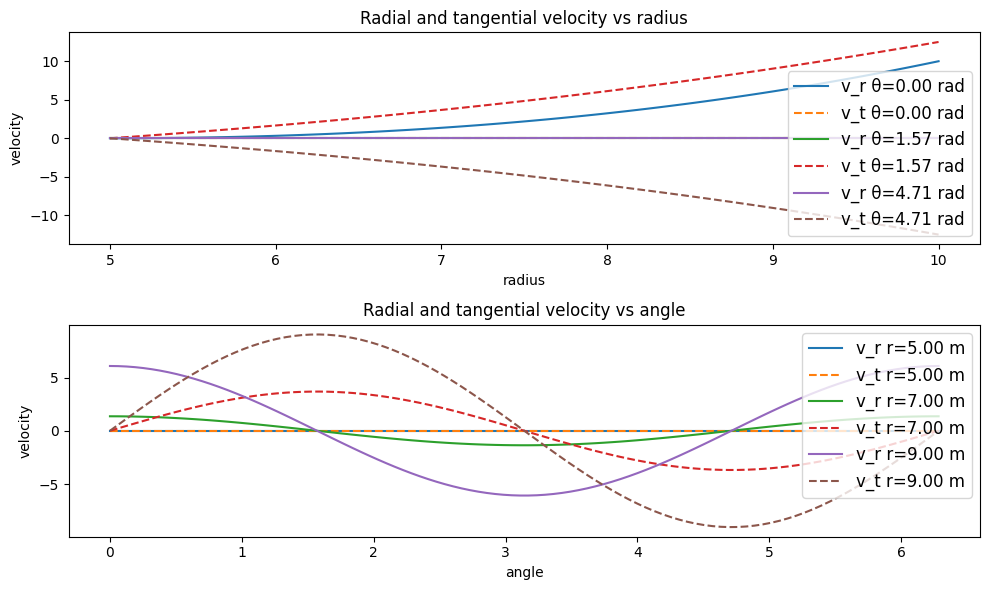

In [ ]:
def velocity_profile(radius, angle):
    v_r = v_infinity * (1 - (3/2) * (radius/R) + (1/2) * (radius/R)**3) * np.cos(angle)
    v_t = v_infinity * (-1 + (3/4) * (radius/R) + (1/4) * (radius/R)**3) * np.sin(angle)
    return v_r, v_t

fig, ax = plt.subplots(2, 1, figsize=[10, 6])

# Plots for constant angles
theta_list = [0, np.pi/2, 3*np.pi/2]

for theta in theta_list:
    ax[0].plot(x, velocity_profile(x, theta)[0], label=f'v_r θ={theta:.2f} rad')
    ax[0].plot(x, velocity_profile(x, theta)[1], label=f'v_t θ={theta:.2f} rad', linestyle='--')

ax[0].set_title('Radial and tangential velocity vs radius')
ax[0].set_xlabel('radius')
ax[0].set_ylabel('velocity')
ax[0].legend(fontsize=12)

# Plots for constant radii
radius_list = [5, 7, 9]

for radius in radius_list:
    ax[1].plot(y, velocity_profile(radius, y)[0], label=f'v_r r={radius:.2f} m')
    ax[1].plot(y, velocity_profile(radius, y)[1], label=f'v_t r={radius:.2f} m', linestyle='--')

ax[1].set_title('Radial and tangential velocity vs angle')
ax[1].set_xlabel('angle')
ax[1].set_ylabel('velocity')
ax[1].legend(fontsize=12)

plt.tight_layout()
plt.show()







#### Step 3: Speed profile definition

Recall that the norm of a vector can be calculated by:

$$ |\mathbf{v}| = \sqrt{v_r^2 + v_{\theta}^2} $$

In [ ]:
# Definition of the matrix for the radial component of the velocity
v_r = velocity_profile(X, Y)[0]

# Definition of the matrix for the angular component of the velocity
v_theta = velocity_profile(X, Y)[1]

# Calculation of the magnitude of the vector [v_r, v_theta]
V = np.sqrt(v_r**2 + v_theta**2)


#### Visualization

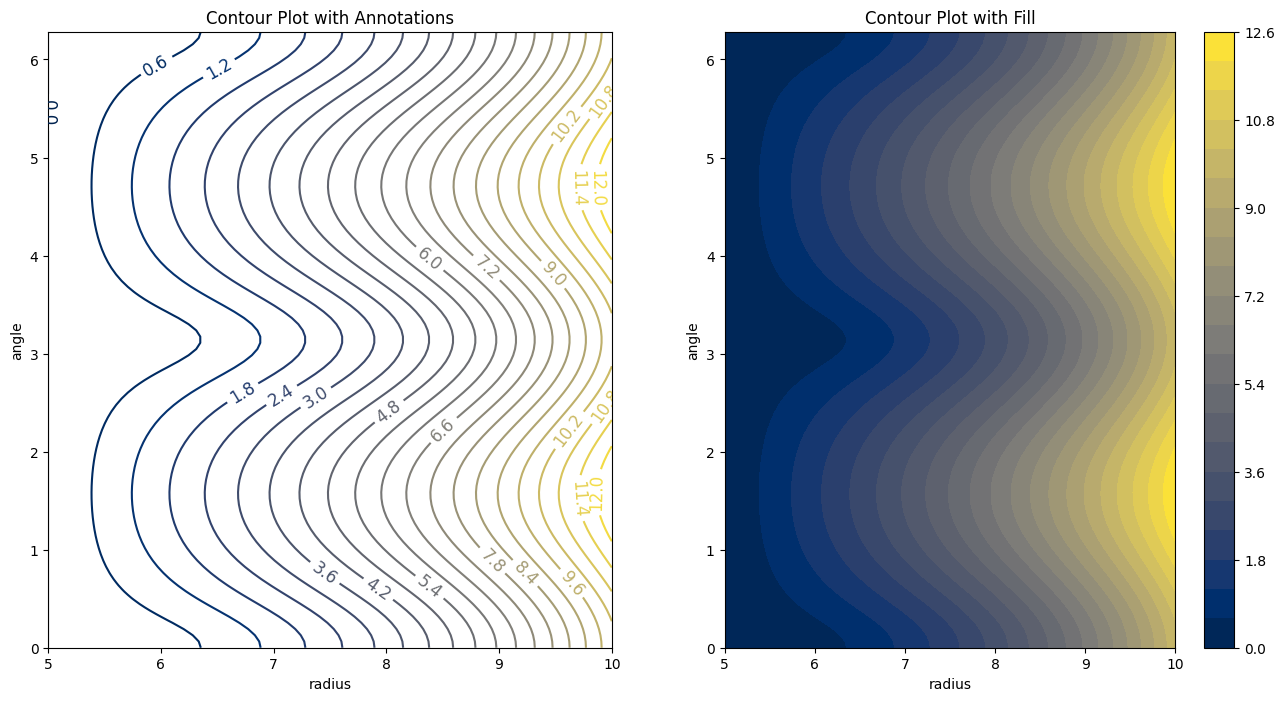

In [ ]:
# Selecting a color map inclusive for people with color visibility limitations
cm = 'cividis'

# Creating an "axis" object for plotting, and two subplots
fig, ax = plt.subplots(1, 2, figsize=[16, 8])

# Contour plot without fill
cp = ax[0].contour(X, Y, V, 20, cmap=cm)

# Annotations
ax[0].clabel(cp, inline=True, fontsize=12)

# Contour plot with fill
cpf = ax[1].contourf(X, Y, V, 20, cmap=cm)

# Annotations
# ax[1].clabel(cpf, inline=True, fontsize=12)

# Adding color bar
fig.colorbar(cpf)

# Titles for the plots
ax[0].set_title('Contour Plot with Annotations')
ax[1].set_title('Contour Plot with Fill')
ax[0].set_xlabel('radius')
ax[1].set_xlabel('radius')
ax[0].set_ylabel('angle')
ax[1].set_ylabel('angle')

# Saving the file
plt.savefig('contours.pdf')


Also, we can plot this same graph with a $polar$ $plot$:

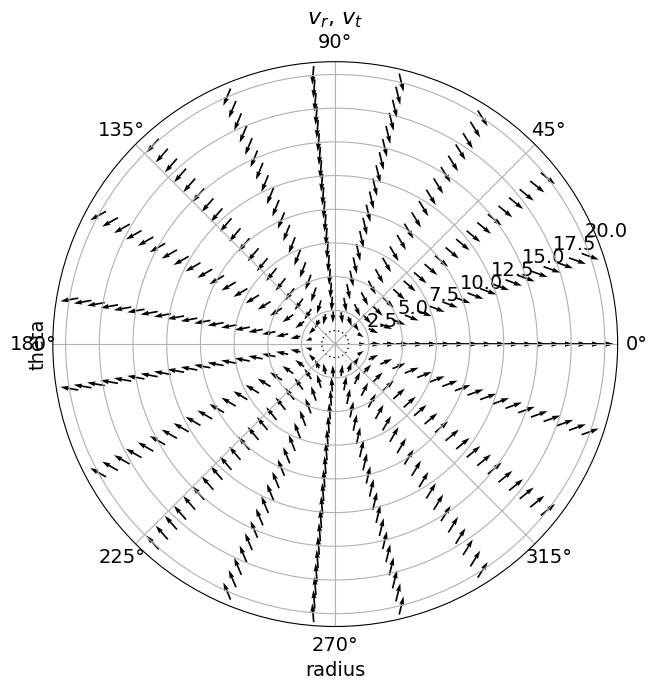

In [ ]:
def velocity_components(R, theta, R0, v_i):
    v_r = v_i * (1 - (3/2) * (R0/R) + (1/2) * (R0/R)**3) * np.cos(theta)
    v_t = v_i * (-1 + (3/4) * (R0/R) + (1/4) * (R0/R)**3) * np.sin(theta)
    return v_r, v_t

R_0 = 1
R_inf = 20
v_i = 5

# Create a polar coordinate grid
R_vals = np.linspace(R_0, R_inf, 200)  # R values in the range [1, 20]
t_vals = np.linspace(0, 2 * np.pi, 200)  # t values in the range [0, 2π]
R, T = np.meshgrid(R_vals, t_vals)

# Calculate the velocity components at each point in the grid
v_r, v_t = velocity_components(R, T, R_0, v_i)

# Calculate the magnitude of the velocity at each point
V = np.sqrt(v_r**2 + v_t**2)

# Define a new range of values for R_vals and t_vals for better visualization
R_vals = np.linspace(R_0, R_inf, 20)  # R values in the range [1, 20]
t_vals = np.linspace(0, 2 * np.pi, 20)  # t values in the range [0, 2π]
R, T = np.meshgrid(R_vals, t_vals)
v_r, v_t = velocity_components(R, T, R_0, v_i)

# The subplot_kw={'projection': 'polar'} command creates a quiver plot with polar coordinates. Here, you are only asked to add titles to the axes and the plot.
# Finally, add the colorbar to your plot in polar coordinates.
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(7, 7))
quiver = ax.quiver(T, R, v_r, v_t, cmap='cividis', pivot='middle', clim=[0, V.max()])
ax.set_title(r'$v_r$' + r', $v_t$', size=16)
ax.tick_params(labelsize=14)
ax.set_xlabel("radius", size=14)
ax.set_ylabel("theta", size=14)

plt.tight_layout()
plt.show()
